In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#X = dataset.iloc[:, 3:5].values
#a:,b =all rows of a , b is columns
#3 and 4  is 3:5(start index 3, and exclusive of the stop index 5).
#Annual Income (k$) =3,Spending Score (1-100)=4 ,index [0]=Age
X = dataset.iloc[:, 3:5]

In [5]:
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [6]:
pip install scipy --upgrade

Note: you may need to restart the kernel to use updated packages.


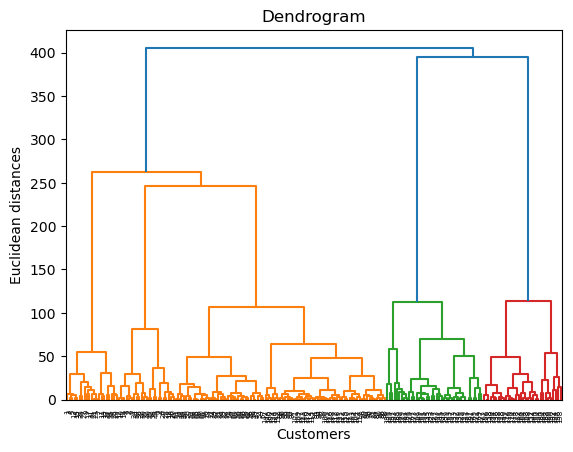

In [7]:
#Dendrogram --Agglomerative
from scipy.cluster import hierarchy as sch
#import scipy.cluster.hierachy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [8]:
#pip install --upgrade scipy
!pip install scikit-learn --upgrade 

In [9]:
pip install -U scikit-learn

In [17]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with the desired number of clusters
aggcls = AgglomerativeClustering(n_clusters=5)

# Fit the model and predict cluster labels
Aggcls= aggcls.fit_predict(X) #label

#SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='?   to fix use space between =   and () check    
#model npot ound , install upgrade and restart kernal

In [11]:
#KMeans --Elbow Method  
#from sklearn.cluster import KMeans
#list1 = []
#for i in range(1, 11):
    #kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #kmeans.fit(X)
    #list1.append(kmeans.inertia_)
#plt.plot(range(1, 11), list1)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [ ]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
#y_kmeans = kmeans.fit_predict(X)

In [14]:
newds_agg=pd.DataFrame(dataset)
#AttributeError: module 'pandas' has no attribute 'dataframe'

In [15]:
newds_agg

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
#added new column to dataset
newds_agg['Cluster_group']=Aggcls  #labels

In [19]:
newds_agg

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [20]:
newds_agg.to_csv("cluster_newds_agg.csv",index=False)
#created new csv file in same folder with updated new column along eith existing dataset columns

In [23]:
dir(AgglomerativeClustering)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'fit',
 'fit_predict',
 'get_metadata_routing',
 'get_params',
 'set_params']

In [24]:
newds_agg.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

In [25]:
newds_agg.columns[3]

'Annual Income (k$)'

In [ ]:
#!pip install seaborn

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


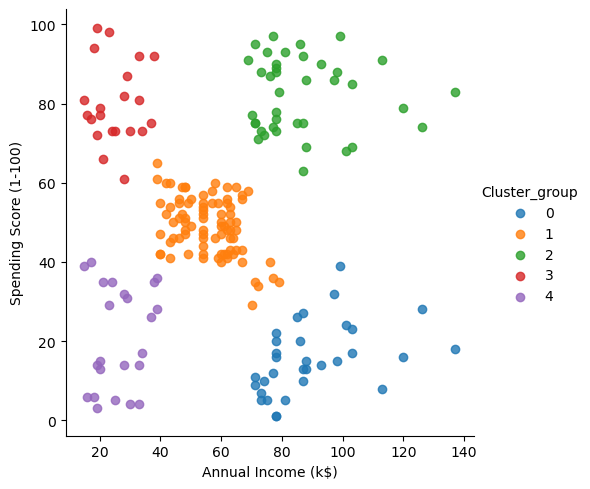

In [27]:
import seaborn as sns
facet = sns.lmplot(data=newds_agg, x=newds_agg.columns[3], y=newds_agg.columns[4], hue=newds_agg.columns[5],
                   fit_reg=False,legend_out=True)